In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [3]:
dfIris = pd.read_csv("Iris.csv")
# Random 10 rows from dataframe
dfIris.sample(n=10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
15,16,5.7,4.4,1.5,0.4,Iris-setosa
44,45,5.1,3.8,1.9,0.4,Iris-setosa
120,121,6.9,3.2,5.7,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
115,116,6.4,3.2,5.3,2.3,Iris-virginica
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
131,132,7.9,3.8,6.4,2.0,Iris-virginica
137,138,6.4,3.1,5.5,1.8,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [4]:
# Detecting missing values
dfIris.info() 
# Total missing values for each feature
print("\n")
print(dfIris.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [5]:
# Encoding Categorical Data
dfIris['Species'] = dfIris['Species'].astype('category').cat.codes
dfIris["Species"].unique()

array([0, 1, 2], dtype=int64)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [34]:
dfIris.drop("Species", axis=1).apply(lambda x: x.corr(dfIris["Species"]))

Id               0.942830
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
dtype: float64

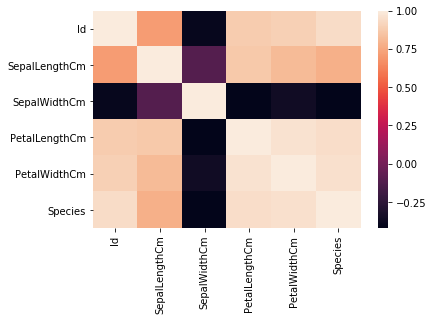

In [35]:
# Since no features are between the range of -0.1 and 0.1 based on correlation matrix, 
# hence no columns will be dropped from the dataset
corr = dfIris.corr()# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [36]:
# Since variance of all variabes are more than 0.1, hence not dropping any
dfIris.var()

Id               1887.500000
SepalLengthCm       0.685694
SepalWidthCm        0.188004
PetalLengthCm       3.113179
PetalWidthCm        0.582414
Species             0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

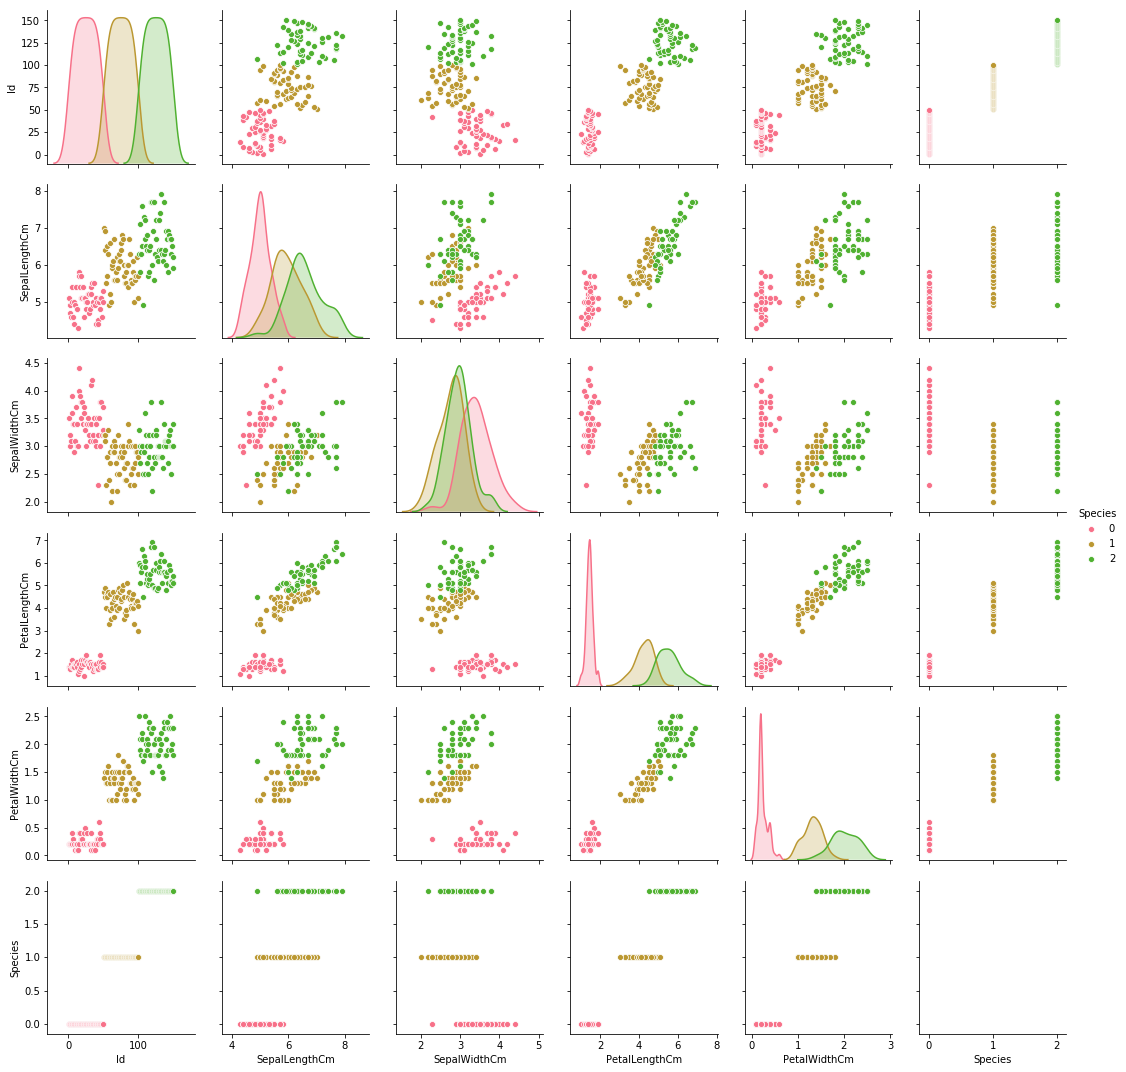

In [37]:
sns.pairplot(dfIris, hue="Species")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [38]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dfIris[feature_columns].values
y = dfIris['Species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [39]:
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)
# Fitting the model
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [40]:
# creating list of K for KNN
k_list = list(range(1,20,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

<Figure size 432x288 with 0 Axes>

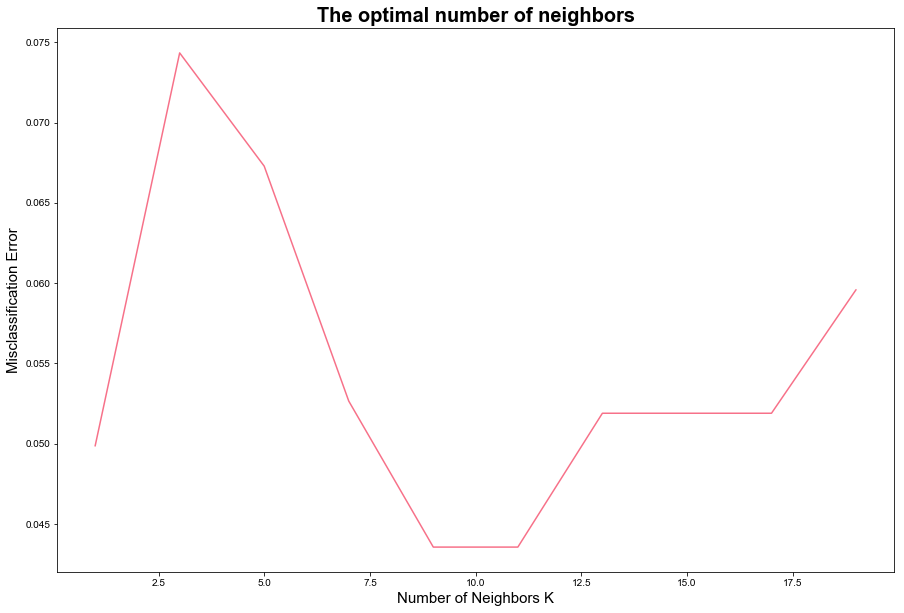

In [41]:
# plot misclassification error vs k
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

# Naive Bayes with Iris Data

In [13]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [42]:
X = dfIris.iloc[:,1:5]
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [43]:
#Check the dataset
y = dfIris.iloc[:,5]
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int8


# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

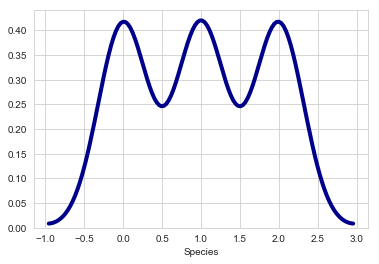

In [44]:
sns.distplot(y, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

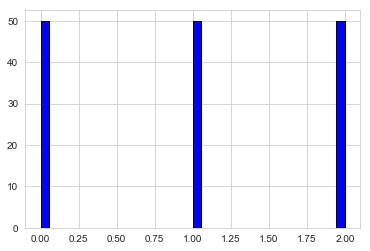

In [45]:
# matplotlib histogram
plt.hist(y, color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.show()

### Question 12 
Find Correlation among all variables and give your insights 

In [46]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here
corr = dfIris.corr()
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


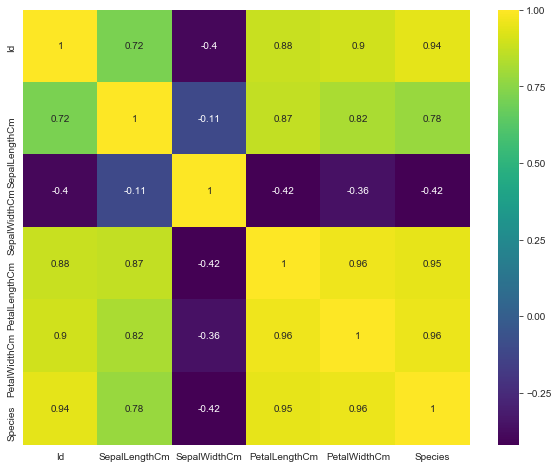

In [47]:
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap='viridis', annot=True)
plt.show()

In [48]:
# As per the correlation matrix and heatmap, it can be inferred that the feature "SepalWidthCm" has weak correlation with the
# target variable "Species", hence dropping it from dataframe
# dropping Id columns as well as it will have no relevance in model prediction
dfIris.drop(["Id","SepalWidthCm"], axis=1, inplace=True)
dfIris.columns

Index(['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], dtype='object')

### Split data in Training and test set in 80:20.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


### Question 13 
Do Feature Scaling 

In [50]:
# Use StandardScaler or similar methods
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(dfIris)
scaled_df = pd.DataFrame(scaled_df, columns=['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])

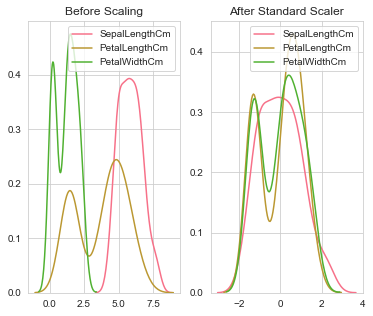

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(dfIris['SepalLengthCm'], ax=ax1)
sns.kdeplot(dfIris['PetalLengthCm'], ax=ax1)
sns.kdeplot(dfIris['PetalWidthCm'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['SepalLengthCm'], ax=ax2)
sns.kdeplot(scaled_df['PetalLengthCm'], ax=ax2)
sns.kdeplot(scaled_df['PetalWidthCm'], ax=ax2)
plt.show()

### Question 14 
Train and Fit NaiveBayes Model

In [52]:
#Initialize Gaussian Naive Bayes
clf = GaussianNB()
#Fitting the training set
clf.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
#Predicting for the Test Set
y_pred = clf.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [55]:
print ("Accuracy of the Naive Bayes Clasification is: ", accuracy_score(y_test, y_pred))

Accuracy of the Naive Bayes Clasification is:  0.9666666666666667


In [56]:
cm = metrics.confusion_matrix(y_pred, y_test)
print(cm)

[[11  0  0]
 [ 0 13  1]
 [ 0  0  5]]


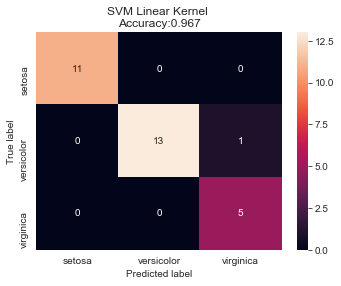

In [57]:
# In this example the model overall accuracy on the test set was 0.966 (Accurate predictions/All or True Positives/All).
# An insight we can get from the matrix is that the model was very accurate at classifying setosa and versicolor
# (True Positive/All = 1.0). However, accuracy for virginica was lower (5/6= 0.83)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()